<a target="_blank" rel="noopener noreferrer" href="https://colab.research.google.com/github/ccaudek/ds4psy_2023/blob/main/316_conjugate_families_1.ipynb">![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)</a>


(distr-coniugate-1-notebook)=
# Distribuzioni coniugate (1)

In questo capitolo, ci focalizziamo sulla derivazione della distribuzione a posteriori attraverso l'uso di una distribuzione a priori coniugata. Sarà esaminato in dettaglio il modello beta-binomiale, un esempio paradigmatico che evidenzia il vantaggio dell'uso delle distribuzioni a priori coniugate in inferenza bayesiana. L'impiego di tali distribuzioni facilita notevolmente il processo di inferenza, permettendo di ottenere una distribuzione a posteriori attraverso calcoli analitici diretti e semplificati. Questa metodologia non solo rende il processo di inferenza più gestibile ma anche più intuitivo, offrendo una chiara dimostrazione di come le scelte a priori influenzino l'analisi bayesiana.

## Preparazione del Notebook

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import arviz as az
from scipy import stats

In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")
sns.set_theme(palette="colorblind")

## Derivazione analitica della distribuzione a posteriori

Le distribuzioni a priori coniugate costituiscono una classe speciale di distribuzioni di probabilità aventi una particolare caratteristica: se la distribuzione a priori appartiene a questa classe, anche la distribuzione a posteriori appartiene alla stessa classe, ovvero mantiene la stessa forma funzionale. Questo aspetto semplifica notevolmente l'aggiornamento delle nostre credenze riguardo al parametro di interesse, in quanto coinvolge semplicemente la modifica dei parametri della distribuzione a priori. Ad esempio, quando selezioniamo una distribuzione a priori Beta e la verosimiglianza corrisponde a una distribuzione binomiale, la distribuzione a posteriori sarà anch'essa una distribuzione Beta.

Nonostante le distribuzioni a priori coniugate siano la scelta preferibile dal punto di vista matematico, in quanto permettono di calcolare analiticamente la distribuzione a posteriori evitando calcoli complessi, le moderne tecniche di inferenza bayesiana offrono flessibilità nell'utilizzo di una vasta gamma di distribuzioni a priori. Questa flessibilità elimina la necessità di vincolarsi esclusivamente alle distribuzioni coniugate. Tuttavia, le distribuzioni a priori coniugate continuano a giocare un ruolo didattico rilevante, poiché presentano una soluzione analitica per il processo di aggiornamento bayesiano. Nel presene capitolo, esploreremo dettagliatamente il modello beta-binomiale, in cui la verosimiglianza binomiale si combina con la scelta di una distribuzione a priori Beta. Questo modello rappresenta la base dell'inferenza bayesiana su una proporzione.

## Lo schema beta-binomiale 

La distribuzione Beta è una funzione di probabilità che trova applicazione nella descrizione della variabilità di una variabile casuale limitata all'intervallo [0,1]. I suoi parametri, indicati come $\alpha$ e $\beta$, determinano la sua forma (si veda il capitolo {ref}`cont-rv-distr-notebook`). Questa distribuzione è particolarmente indicata per rappresentare le nostre convinzioni iniziali riguardo a una proporzione. 

Una volta raccolti i dati e ottenuto un valore osservato per la proporzione, possiamo sfruttare l'approccio bayesiano per ottenere la distribuzione a posteriori. Questo processo comporta la combinazione della distribuzione a priori con la verosimiglianza, consentendoci di raffinare le nostre credenze sulla proporzione. 

Se optiamo per la distribuzione Beta come distribuzione a priori, la sua forma risulta essere:

$$
\theta^{\alpha - 1} (1 - \theta)^{\beta - 1}.
$$

In questo contesto, la normalizzazione non è rilevante poiché verrà applicata successivamente durante l'aggiornamento bayesiano.

Nel caso di una proporzione, la funzione di verosimiglianza è determinata dalla distribuzione binomiale:

$$
\theta^{y} (1 - \theta)^{n - y}.
$$

Anche in questo caso, il fattore di normalizzazione può essere tralasciato.

Per calcolare la distribuzione a posteriori, è necessario moltiplicare la funzione nucleo a priori, derivante dalla distribuzione Beta, con la funzione nucleo della verosimiglianza binomiale:

$$
\theta^{\alpha - 1} (1 - \theta)^{\beta - 1} \cdot \theta^{y} (1 - \theta)^{n - y} = \theta^{\alpha - 1 + y} (1 - \theta)^{\beta - 1 + n - y}.
$$

Il risultato ottenuto rappresenta la forma non normalizzata della distribuzione Beta con parametri $\alpha+y$ e $\beta+n-y$. In altre parole, quando osserviamo $y$ successi su $n$ prove di Bernoulli e selezioniamo una distribuzione a priori Beta con parametri $\alpha$ e $\beta$, l'aggiornamento bayesiano genera una distribuzione a posteriori Beta con parametri $\alpha+y$ e $\beta+n-y$.

L'esempio appena illustrato rappresenta un caso di analisi coniugata. In particolare, la combinazione della funzione di verosimiglianza binomiale con la distribuzione a priori Beta è noto come "caso coniugato beta-binomiale" ed è regolato dal seguente teorema.

```{admonition} Teorema
Supponiamo di avere una funzione di verosimiglianza $Bin(n, y \mid \theta)$ e una distribuzione a priori $Beta(\alpha, \beta)$. In questo caso, la distribuzione a posteriori del parametro $\theta$ sarà una distribuzione $Beta(\alpha + y, \beta + n - y)$. 
```

### Esempio 1

Uno studio ha esaminato un totale di 980 nascite, tra le quali 437 sono state femmine {cite:p}`gelman1995bayesian`. Per determinare la distribuzione a posteriori della proporzione di femmine, indicata con $ \theta $, si è assunta una distribuzione a priori uniforme. Questo implica l'uso di una distribuzione Beta come prior, specificatamente $ Beta(\alpha = 1, \beta = 1) $, che è equivalente a una distribuzione uniforme.

I dati specifici del problema sono: $ y = 437 $ femmine su $ n = 980 $ nascite totali. Applicando il teorema delle famiglie coniugate beta-binomiali, possiamo aggiornare i parametri della distribuzione Beta a priori con i dati osservati. La distribuzione a posteriori sarà quindi anch'essa una distribuzione Beta, ma con parametri aggiornati: $ \alpha' = \alpha + y = 1 + 437 = 438 $ e $ \beta' = \beta + n - y = 1 + 980 - 437 = 544 $. Quindi, la distribuzione a posteriori della proporzione di femmine $ \theta $ è descritta dalla distribuzione $ Beta(438, 544) $. 

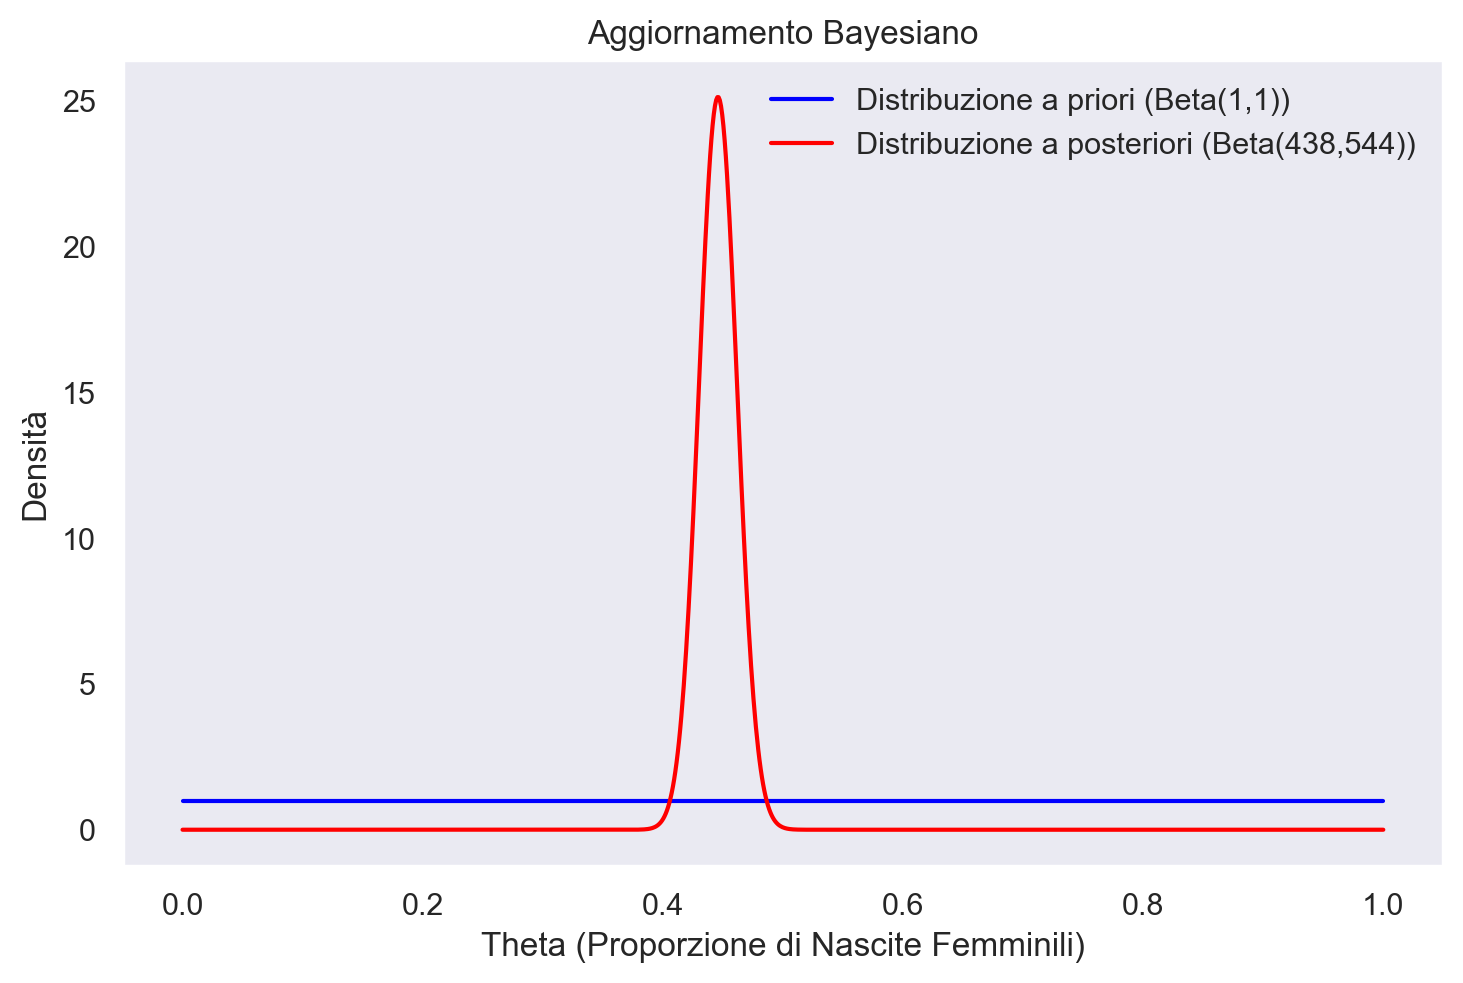

In [3]:
# Parameters for prior and posterior
alpha_prior, beta_prior = 1, 1
y, n = 437, 980
alpha_posterior, beta_posterior = alpha_prior + y, beta_prior + n - y

# Theta values for plotting
theta_values = np.linspace(0, 1, 1000)

# Prior Distribution (Beta(1,1) - Uniform)
prior_distribution = stats.beta(alpha_prior, beta_prior).pdf(theta_values)

# Posterior Distribution (Beta(438,544))
posterior_distribution = stats.beta(alpha_posterior, beta_posterior).pdf(theta_values)

plt.plot(
    theta_values,
    prior_distribution,
    label="Distribuzione a priori (Beta(1,1))",
    color="blue",
)
plt.plot(
    theta_values,
    posterior_distribution,
    label="Distribuzione a posteriori (Beta(438,544))",
    color="red",
)

plt.title("Aggiornamento Bayesiano")
plt.xlabel("Theta (Proporzione di Nascite Femminili)")
plt.ylabel("Densità")
plt.legend()
plt.grid()

plt.show()

### Esempio 2

Nel nostro secondo esempio, analizzeremo i dati relativi all'AIDS forniti dall'"Australian National Centre in HIV Epidemiology and Clinical Research". Questi dati sono inclusi nel pacchetto R denominato MASS e sono raccolti nel DataFrame "Aids2". Questo dataset documenta i casi di individui diagnosticati con l'AIDS prima del 1° luglio 1991. In totale, sono stati registrati 2843 casi, di cui 1082 individui erano ancora in vita e 1761 erano deceduti fino a quella data. Il nostro obiettivo analitico è di esaminare il tasso di mortalità associato all'AIDS.

Considerando i casi come eventi indipendenti, i dati osservati (sopravvissuti $y = 1082$) possono essere trattati come una successione di esiti Bernoulliani. Di conseguenza, la funzione di verosimiglianza può essere modellata con una distribuzione binomiale. Adottando una distribuzione a priori Beta debolmente informativa, con parametri $ \alpha = 2 $ e $ \beta = 2 $, otteniamo che la distribuzione a posteriori sarà anch'essa una Beta, ma con parametri aggiornati, ovvero $ \alpha' = 2 + 1761 $ e $ \beta' = 2 + 2843 - 1761 $. In termini numerici, ciò corrisponde a una distribuzione Beta(1763, 1084), fornendoci un aggiornamento basato sui dati osservati e le informazioni a priori per comprendere meglio il tasso di mortalità tra i pazienti con AIDS.

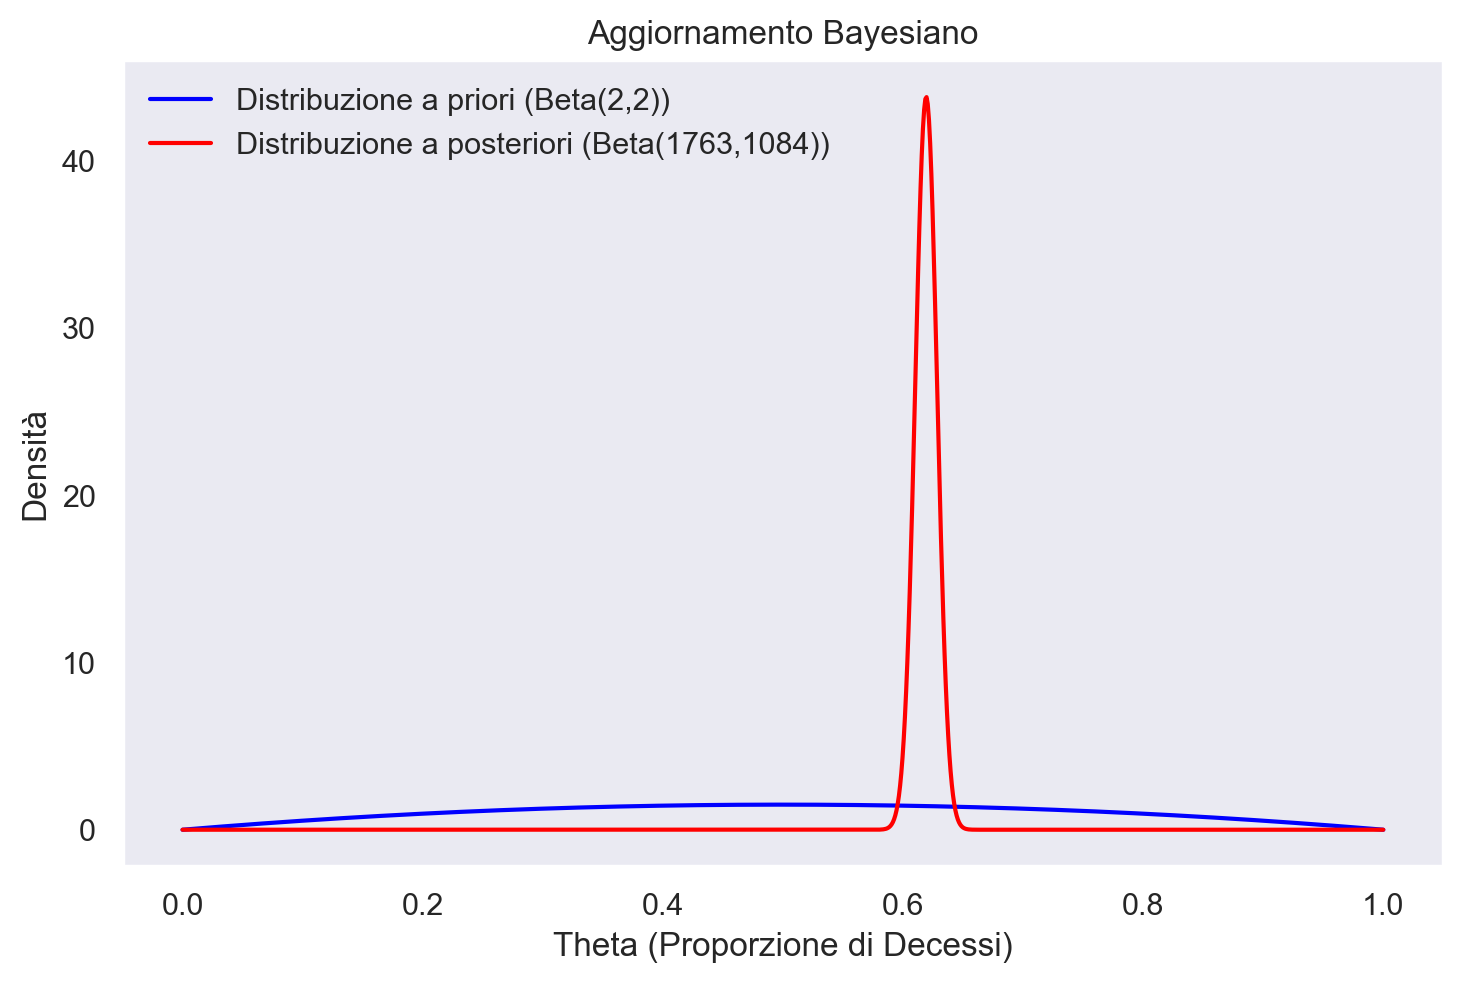

In [4]:
# Parameters for prior and posterior in the AIDS example
alpha_prior, beta_prior = 2, 2
deaths, total_cases = 1761, 2843
survivors = total_cases - deaths
alpha_posterior, beta_posterior = alpha_prior + deaths, beta_prior + survivors

# Theta values for plotting
theta_values = np.linspace(0, 1, 1000)

# Prior Distribution (Beta(2,2))
prior_distribution = stats.beta(alpha_prior, beta_prior).pdf(theta_values)

# Posterior Distribution (Beta(1763,1084))
posterior_distribution = stats.beta(alpha_posterior, beta_posterior).pdf(theta_values)

plt.plot(
    theta_values,
    prior_distribution,
    label="Distribuzione a priori (Beta(2,2))",
    color="blue",
)
plt.plot(
    theta_values,
    posterior_distribution,
    label="Distribuzione a posteriori (Beta(1763,1084))",
    color="red",
)

plt.title("Aggiornamento Bayesiano")
plt.xlabel("Theta (Proporzione di Decessi)")
plt.ylabel("Densità")
plt.legend()
plt.grid()

plt.show()

### La distribuzione a priori

Nell'esempio che riguarda la sopravvivenza dei pazienti con AIDS, la scelta di una distribuzione Beta come prior nel nostro modello bayesiano ci permette di quantificare le credenze iniziali riguardo a $ \theta $, la probabilità di decesso. Adottando una distribuzione a priori $ Beta(\alpha = 2, \beta = 2) $ per $ \theta $, esprimiamo una convinzione iniziale di sostanziale incertezza circa l'esito "sopravvivenza post-diagnosi di AIDS" nel 1991. Questa scelta riflette la nostra assunzione che il punto di massima verosimiglianza per $ \theta $ sia 0.5, indicando una situazione di equilibrio tra sopravvivenza e decesso. Tuttavia, questa assunzione non esclude la plausibilità di altri valori di $ \theta $, ad eccezione degli estremi, conferendo flessibilità e apertura alle nostre credenze iniziali sull'incertezza dell'evento.

Un sommario della distribuzione $Beta(alpha=2, beta=2)$ si ottiene usando la funzione seguente:

In [5]:
def summarize_beta(alpha, beta):
    """Summarize a Beta Model for \eqn{\pi}

    @param alpha,beta positive shape parameters of the Beta model

    Return Pandas Series with summary
    """

    mean = alpha / (alpha + beta)
    var = alpha * beta / ((alpha + beta) ** 2 * (alpha + beta + 1))
    sd = np.sqrt(var)

    if alpha < 1 and beta < 1:
        mode = "0 and 1"
    elif alpha <= 1 and beta > 1:
        mode = 0
    elif alpha > 1 and beta < 1:
        mode = 1
    else:
        mode = (alpha - 1) / (alpha + beta - 2)
    return pd.Series({"mean": mean, "mode": mode, "var": var, "sd": sd})

In [6]:
summarize_beta(alpha=2, beta=2)

mean    0.500000
mode    0.500000
var     0.050000
sd      0.223607
dtype: float64

Possiamo quantificare la nostra incertezza calcolando, con un grado di fiducia soggettiva del 94%, la regione nella quale, in base a tale credenza a priori, si trova il valore del parametro. Per ottenere tale intervallo di credibilità a priori, usiamo la funzione `beta.ppf` di `scipy.stats`. 

In [7]:
li = stats.beta.ppf(0.03, 2, 2)
ls = stats.beta.ppf(0.97, 2, 2)
list([li, ls])

[0.10364483924951279, 0.8963551607504872]

Se poniamo $\alpha=10$ e $\beta=10$, anche questa scelta descrive una credenza a priori per la quale il valore più credibile per $\theta$ è 0.5.

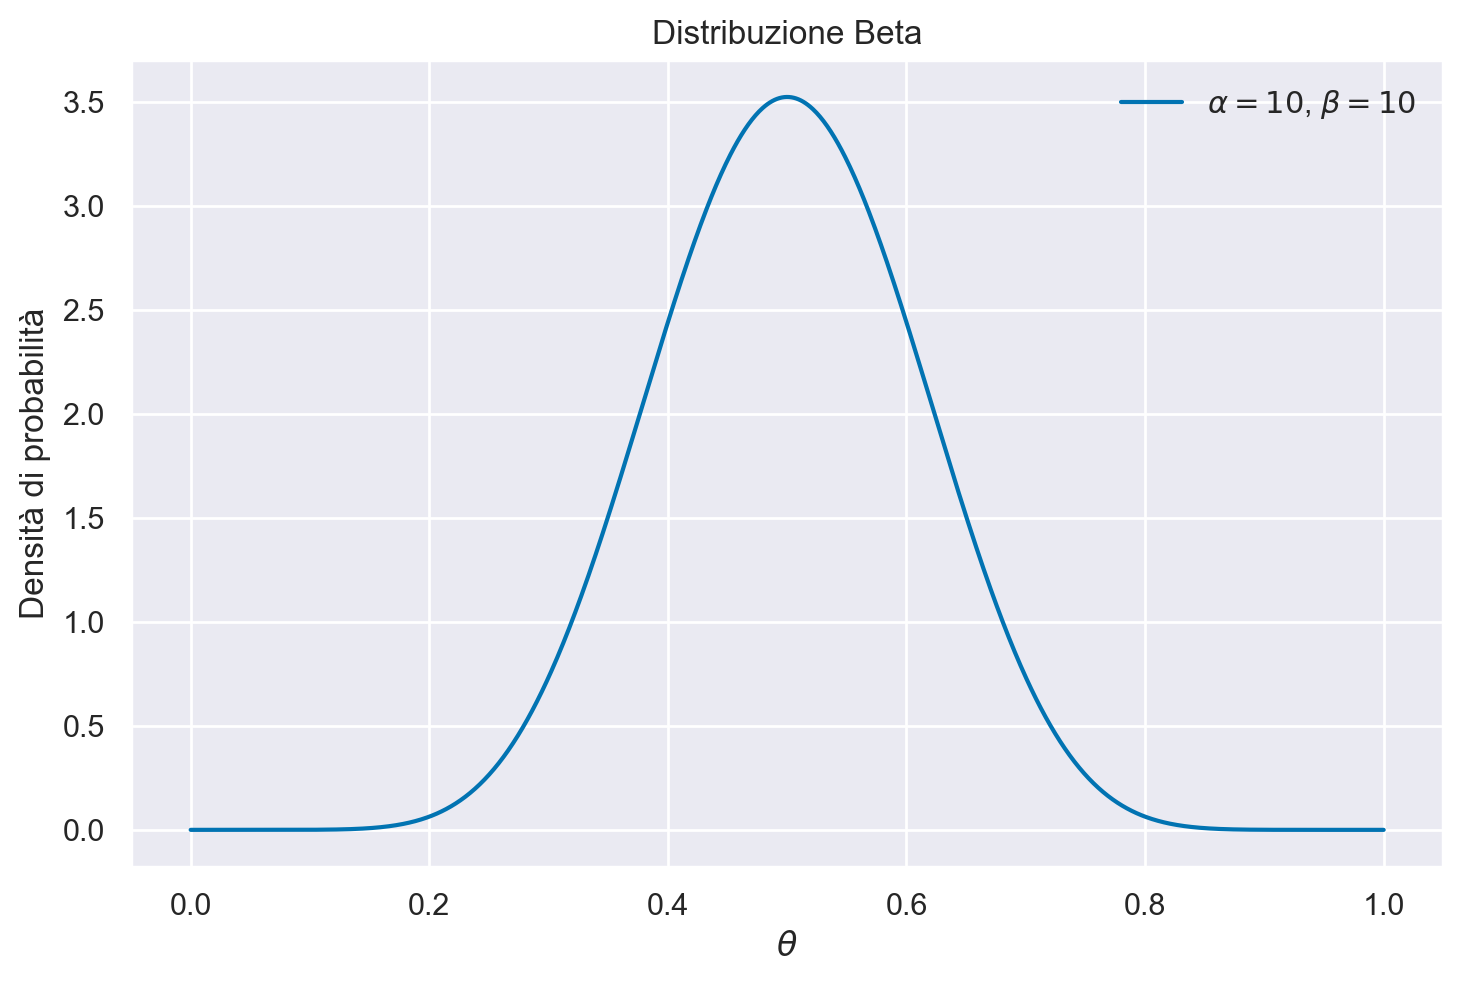

In [8]:
# Crea un array di valori di theta
theta = np.linspace(0, 1, 1000)
pdf_pre = stats.beta.pdf(theta, 10, 10)
plt.plot(theta, pdf_pre, label=r'$\alpha=10$, $\beta=10$')
plt.xlabel(r'$\theta$')
plt.ylabel('Densità di probabilità')
plt.title('Distribuzione Beta')
plt.legend()
plt.show()

Tuttavia, in questo caso la nostra incertezza a priori sul valore del parametro è minore, come indicato dall'intervallo di credibilità ordine 0.94.

In [9]:
li = stats.beta.ppf(0.03, 10, 10)
ls = stats.beta.ppf(0.97, 10, 10)
list([li, ls])

[0.2964110284916252, 0.7035889715083747]

La scelta di una distribuzione a priori in un'analisi dati pratica dipende dalle credenze iniziali che desideriamo integrare nell'analisi. Quando non disponiamo di informazioni a priori specifiche, potremmo essere tentati di selezionare $ \alpha=1 $ e $ \beta=1 $, che equivalgono a una distribuzione a priori uniforme. Questa scelta suggerisce che tutti i possibili valori del parametro sono considerati ugualmente probabili. Tuttavia, vi sono alcune riserve sull'uso di distribuzioni a priori uniformi, tra cui questioni di instabilità numerica nella stima dei parametri. In contesti dove le informazioni a priori sono limitate o assenti, è generalmente consigliabile optare per una distribuzione a priori debolmente informativa, quale la $ Beta(2, 2) $. Questa distribuzione permette una certa flessibilità, pur fornendo un'informazione iniziale che aiuta a stabilizzare le stime dei parametri.

### La distribuzione a posteriori

Una volta scelta una distribuzione a priori $Beta(2, 2)$, i cui parametri rispecchiano le nostre credenze iniziali su $\theta$, la distribuzione a posteriori diventa una Beta di parametri $\alpha + y$ e $\beta + n - y$. Per i dati dell'esempio sulla sopravvivenza dei pazienti con AIDS, otteniamo la distribuzione a posteriori $p(\theta \mid n, y) \sim Beta(1763, 1084)$.

Essendo $\mathbb{E}[Beta(\alpha, \beta)] = \frac{\alpha}{\alpha + \beta}$, il valore atteso a posteriori di $\theta$ può essere calcolato come:

$$
\mathbb{E}_{\text{post}} [\mathrm{Beta}(\alpha + y, \beta + n - y)] = \frac{\alpha + y}{\alpha + \beta +n}.
$$ (eq-ev-post-beta-bin-1)

Nel caso in cui la distribuzione a priori è debolmente informativa e il campione è molto grande, la distribuzione a priori esercita un effetto trascurabile sulla distribuzione a posteriori. 

Esaminiamo le caratteristiche della distribuzione a posteriori.

In [10]:
summarize_beta(1763, 1084)

mean    0.619248
mode    0.619332
var     0.000083
sd      0.009099
dtype: float64

In [11]:
li = stats.beta.ppf(0.03, 1763, 1084)
ls = stats.beta.ppf(0.97, 1763, 1084)
list([li, ls])

[0.6020654882558294, 0.6362894604661353]

Utilizzando il metodo della massima verosimiglianza, il tasso di mortalità stimato è $\theta = 1761/2843 = 0.62$, con un errore standard (SE) di $\sqrt{0.62(1−0.62)/n} = 0.0091$ e un intervallo di confidenza al 95% di [0.6, 0.63], che è simile all'intervallo ottenuto con l'inferenza bayesiana.

In [12]:
[.62 - stats.norm.ppf(0.97) * 0.0091, .62 + stats.norm.ppf(0.97) * 0.0091]

[0.6028847781658236, 0.6371152218341763]

Perché una distribuzione a priori eserciti un impatto significativo sull'analisi, è importante che sia informativa e possibilmente in contrasto con i dati osservati. Ad esempio, scegliere una distribuzione a priori come Beta(200, 5) introduce una convinzione pre-esistente molto forte nel modello. Questa scelta implica una forte presunzione iniziale verso valori elevati del parametro di interesse, potenzialmente in disaccordo con i dati raccolti. Una distribuzione a priori di questo tipo può essere utilizzata per testare l'influenza delle credenze fortemente radicate rispetto ai dati effettivi, o in situazioni dove si dispone di una solida base di conoscenze a priori che si prevede possa differire significativamente dalle informazioni emergenti dai dati.

/var/folders/cl/wwjrsxdd5tz7y9jr82nd5hrw0000gn/T/ipykernel_92864/1990880785.py:16: RuntimeWarning: divide by zero encountered in log
  log_likelihood = y * np.log(theta) + (n - y) * np.log(1 - theta)


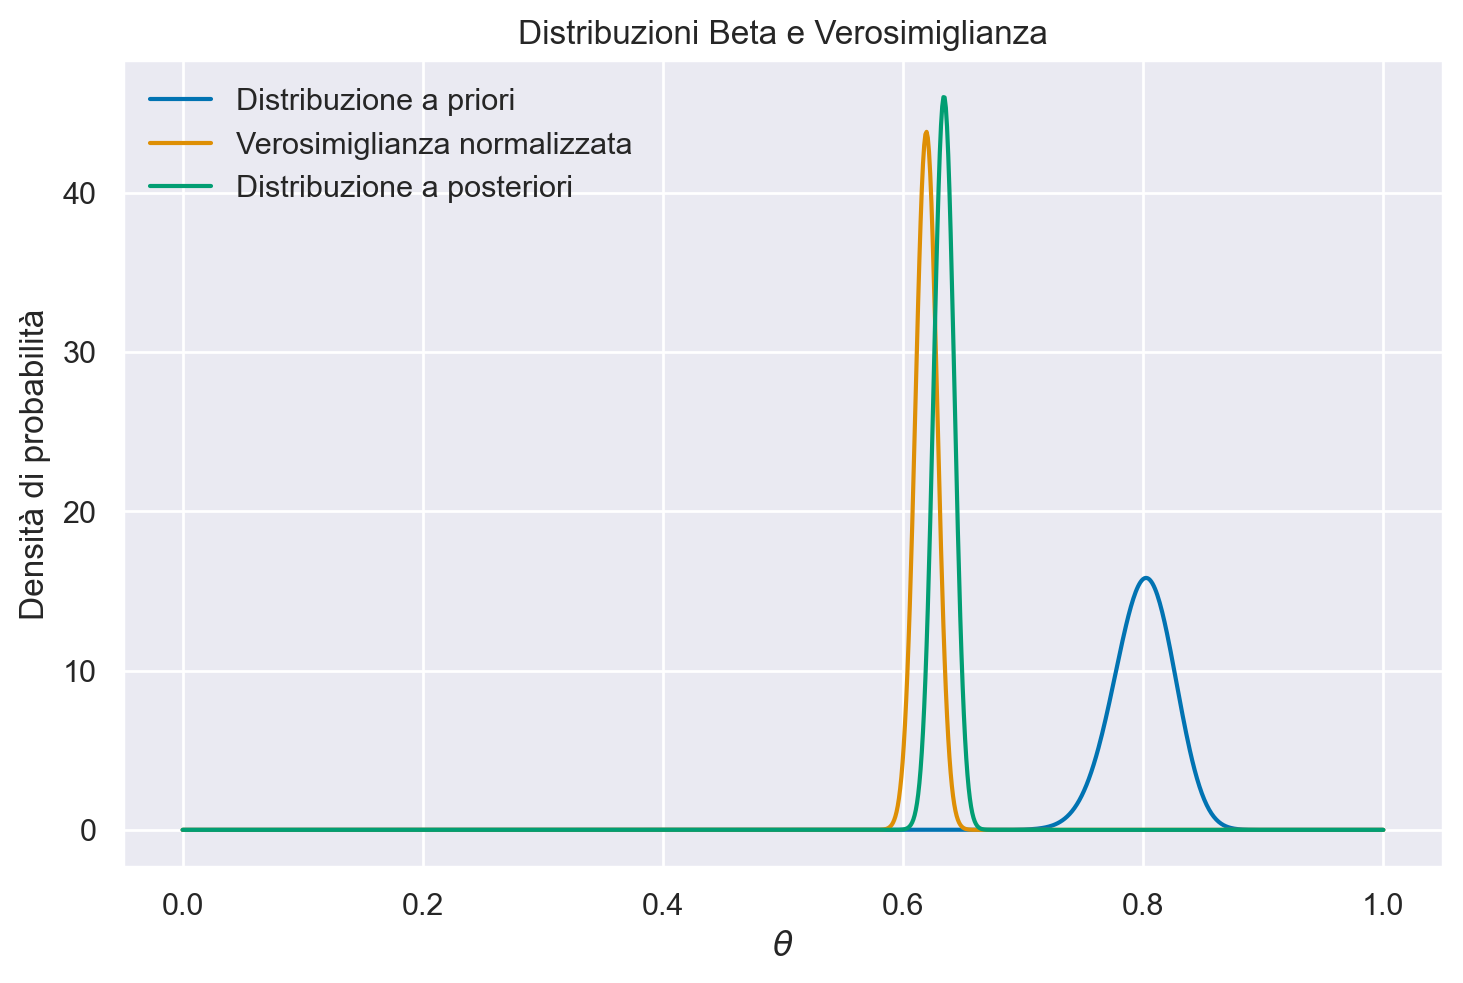

In [13]:
y = 1761
n = 2843

# Parametri delle distribuzioni beta
alpha_pre = 200
beta_pre = 50

alpha_post = alpha_pre + y
beta_post = beta_pre + n - y

# Calcola i valori delle distribuzioni beta
pdf_pre = stats.beta.pdf(theta, alpha_pre, beta_pre)
pdf_post = stats.beta.pdf(theta, alpha_post, beta_post)

# Calcola la log-verosimiglianza
log_likelihood = y * np.log(theta) + (n - y) * np.log(1 - theta)

# Scala la log-verosimiglianza per evitare valori molto piccoli
scaled_log_likelihood = log_likelihood - np.max(log_likelihood)

# Calcola la verosimiglianza normalizzata
normalized_likelihood = np.exp(scaled_log_likelihood)
normalized_likelihood /= np.trapz(normalized_likelihood, theta)

# Crea il grafico
plt.plot(theta, pdf_pre, label=r'Distribuzione a priori')
plt.plot(theta, normalized_likelihood, label=r'Verosimiglianza normalizzata')
plt.plot(theta, pdf_post, label=r'Distribuzione a posteriori')
plt.xlabel(r'$\theta$')
plt.ylabel('Densità di probabilità')
plt.title('Distribuzioni Beta e Verosimiglianza')
plt.legend()
plt.show();

In [14]:
li = stats.beta.ppf(0.03, 1763, 1084)
ls = stats.beta.ppf(0.97, 1763, 1084)
list([li, ls])

[0.6020654882558294, 0.6362894604661353]

### La ricerca sull'obbedienza di Milgram

Consideriamo un altro esempio relativo alla ricerca di Stanley Milgram discussa da {cite:t}`Johnson2022bayesrules`. Nel 1963, Stanley Milgram presentò una ricerca sulla propensione delle persone a obbedire agli ordini di figure di autorità, anche quando tali ordini possono danneggiare altre persone {cite:t}`milgram1963behavioral`. Nell'articolo, Milgram descrive lo studio come

> consist\[ing\] of ordering a naive subject to administer electric shock to a victim. A simulated shock generator is used, with 30 clearly marked voltage levels that range from IS to 450 volts. The instrument bears verbal designations that range from Slight Shock to Danger: Severe Shock. The responses of the victim, who is a trained confederate of the experimenter, are standardized. The orders to administer shocks are given to the naive subject in the context of a "learning experiment" ostensibly set up to study the effects of punishment on memory. As the experiment proceeds the naive subject is commanded to administer increasingly more intense shocks to the victim, even to the point of reaching the level marked Danger: Severe Shock.

All'insaputa del partecipante, gli shock elettrici erano falsi e l'attore stava solo fingendo di provare il dolore dello shock.

{cite:t}`Johnson2022bayesrules` fanno inferenza sui risultati dello studio di Milgram mediante il modello Beta-Binomiale. Il parametro di interesse è la probabilità $\theta$ che una persona obbedisca all'autorità, anche se ciò comporta il rischio di recare danno ad altri, in questo caso somministrando lo shock più severo. Gli autori ipotizzano che, prima di raccogliere dati, le credenze di Milgram riguardo a $\theta$ possano essere rappresentate mediante una distribuzione Beta con parametri $\alpha=1$ e $\beta=10$.

Sia $y = 26$ il numero di soggetti, su un totale di 40 partecipanti, che hanno accettato di infliggere lo shock più severo. Poiché si assume che ciascun partecipante si comporti in modo indipendente dagli altri, la dipendenza di $y$ da $\theta$ può essere modellata mediante la distribuzione binomiale. Di conseguenza, si giunge al seguente modello bayesiano Beta-Binomiale:

$$
\begin{align}
y \mid \theta & \sim \text{Bin}(n = 40, \theta) \notag\\
\theta & \sim \text{Beta}(1, 10) \; . \notag
\end{align}
$$

Il processo di aggiornamento bayesiano è descritto dalla figura ottenuta con la funzione `plot_beta_binomial()`.

/var/folders/cl/wwjrsxdd5tz7y9jr82nd5hrw0000gn/T/ipykernel_92864/431063134.py:16: RuntimeWarning: divide by zero encountered in log
  log_likelihood = y * np.log(theta) + (n - y) * np.log(1 - theta)


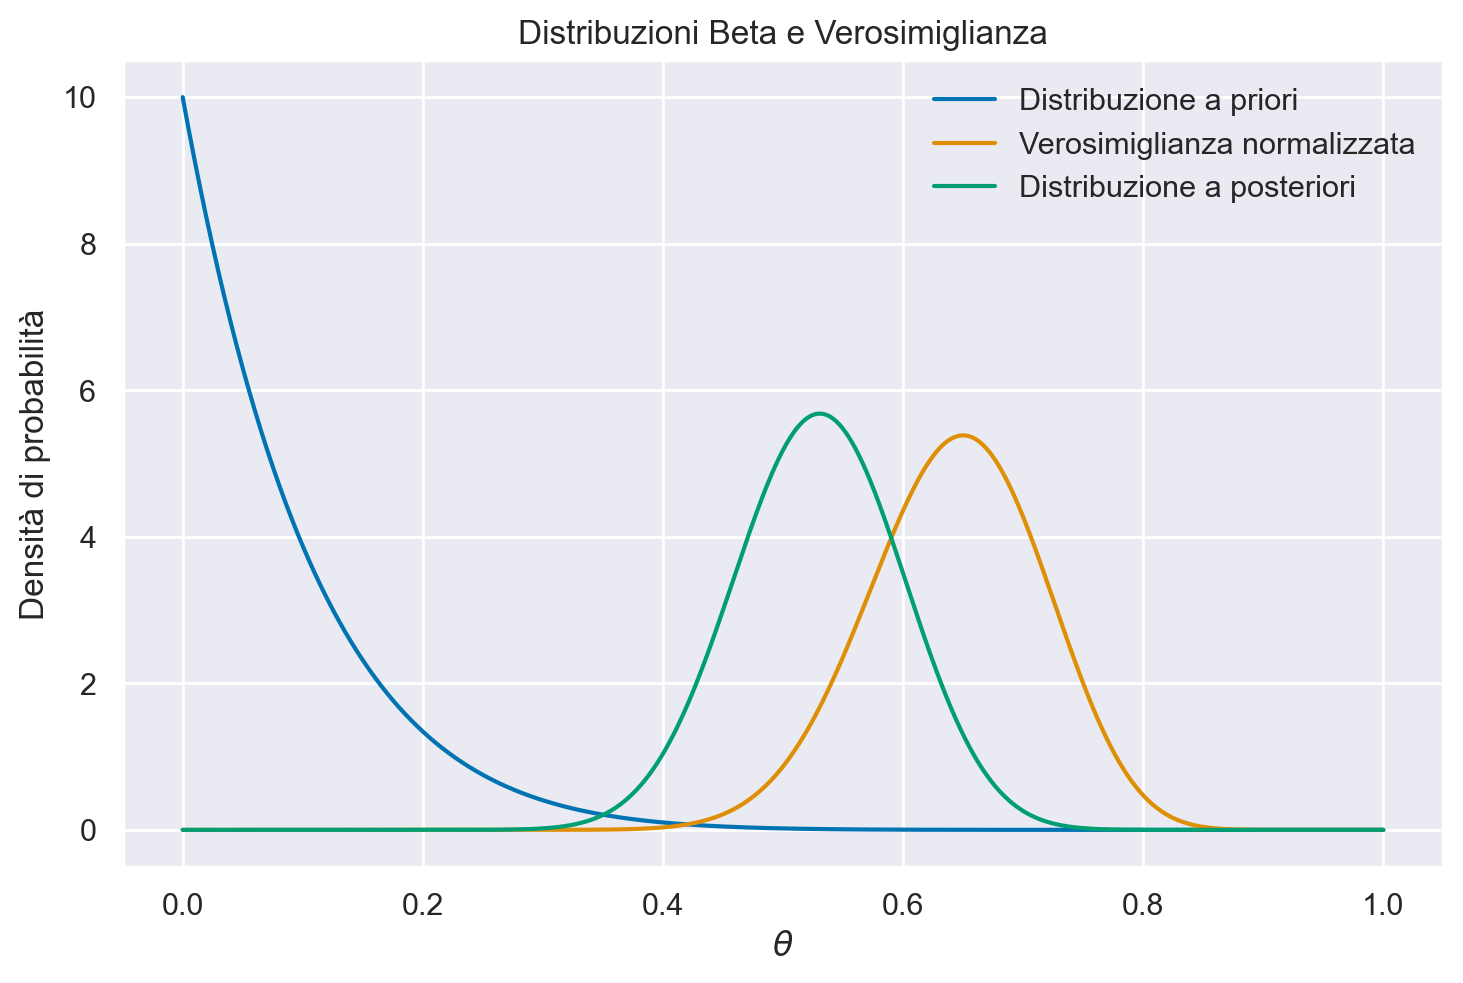

In [15]:
y = 26
n = 40

# Parametri delle distribuzioni beta
alpha_pre = 1
beta_pre = 10

alpha_post = alpha_pre + y
beta_post = beta_pre + n - y

# Calcola i valori delle distribuzioni beta
pdf_pre = stats.beta.pdf(theta, alpha_pre, beta_pre)
pdf_post = stats.beta.pdf(theta, alpha_post, beta_post)

# Calcola la log-verosimiglianza
log_likelihood = y * np.log(theta) + (n - y) * np.log(1 - theta)

# Scala la log-verosimiglianza per evitare valori molto piccoli
scaled_log_likelihood = log_likelihood - np.max(log_likelihood)

# Calcola la verosimiglianza normalizzata
normalized_likelihood = np.exp(scaled_log_likelihood)
normalized_likelihood /= np.trapz(normalized_likelihood, theta)

# Crea il grafico
plt.plot(theta, pdf_pre, label=r'Distribuzione a priori')
plt.plot(theta, normalized_likelihood, label=r'Verosimiglianza normalizzata')
plt.plot(theta, pdf_post, label=r'Distribuzione a posteriori')
plt.xlabel(r'$\theta$')
plt.ylabel('Densità di probabilità')
plt.title('Distribuzioni Beta e Verosimiglianza')
plt.legend();

In [16]:
li = stats.beta.ppf(0.03, 1 + 26, 10 + 40 - 26)
ls = stats.beta.ppf(0.97, 1 + 26, 10 + 40 - 26)
list([li, ls])

[0.3986201110959706, 0.6582462555099745]

Pertanto, possiamo giungere a una conclusione soggettiva con un livello di probabilità del 94% che una proporzione di soggetti compresa tra il 40% e il 66% seguirà le istruzioni di un'autorità, nonostante queste istruzioni comportino evidenti danni ai propri compagni.

## Principali distribuzioni coniugate

Esistono altre combinazioni di verosimiglianza e distribuzione a priori che producono una distribuzione a posteriori con la stessa forma della distribuzione a priori. Ecco alcune delle più note coniugazioni tra modelli statistici e distribuzioni a priori:

- Nel modello Normale-Normale $\mathcal{N}(\mu, \sigma^2_0)$, la distribuzione a priori è $\mathcal{N}(\mu_0, \tau^2)$ e la distribuzione a posteriori è $\mathcal{N}\left(\frac{\mu_0\sigma^2 + \bar{y}n\tau^2}{\sigma^2 + n\tau^2}, \frac{\sigma^2\tau^2}{\sigma^2 + n\tau^2} \right)$.

- Nel modello Poisson-gamma $\text{Po}(\theta)$, la distribuzione a priori è $\Gamma(\lambda, \delta)$ e la distribuzione a posteriori è $\Gamma(\lambda + n \bar{y}, \delta +n)$.

- Nel modello esponenziale $\text{Exp}(\theta)$, la distribuzione a priori è $\Gamma(\lambda, \delta)$ e la distribuzione a posteriori è $\Gamma(\lambda + n, \delta +n\bar{y})$.

- Nel modello uniforme-Pareto $\text{U}(0, \theta)$, la distribuzione a priori è $\text{Pa}(\alpha, \varepsilon)$ e la distribuzione a posteriori è $\text{Pa}(\alpha + n, \max(y_{(n)}, \varepsilon))$.

## Conclusioni

In conclusione, l'utilizzo di priori coniugati presenta vantaggi e svantaggi. Cominciamo con i vantaggi principali. Il principale vantaggio dell'adozione di distribuzioni a priori coniugate risiede nella loro capacità di rendere l'analisi della distribuzione a posteriori trattabile da un punto di vista analitico. Ad esempio, nel corso di questo capitolo abbiamo esaminato come sia possibile formulare la distribuzione a posteriori in seguito a un esperimento composto da una serie di prove di Bernoulli (con una verosimiglianza binomiale), utilizzando una distribuzione Beta sia per la prior che per il posteriore.

Tuttavia, è cruciale riconoscere che i modelli basati sul concetto di famiglie coniugate presentano delle limitazioni intrinseche. Le distribuzioni coniugate a priori sono disponibili solamente per distribuzioni di verosimiglianza di base e relativamente semplici. Per modelli complessi e più realistici, la ricerca di priori coniugati diventa spesso un compito estremamente arduo, limitando quindi la loro utilità. Inoltre, anche quando le distribuzioni a priori coniugate sono disponibili, un modello che ne fa uso potrebbe non essere sufficientemente flessibile per adattarsi alle nostre credenze iniziali. Ad esempio, un modello basato su una distribuzione normale è sempre unimodale e simmetrico rispetto alla media $\mu$. Tuttavia, se le nostre conoscenze iniziali non sono simmetriche o non seguono una distribuzione unimodale, la scelta di una distribuzione a priori normale potrebbe non risultare la più adeguata [@Johnson2022bayesrules].

In [17]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Fri Jan 26 2024

Python implementation: CPython
Python version       : 3.11.7
IPython version      : 8.19.0

pandas    : 2.1.4
arviz     : 0.17.0
numpy     : 1.26.2
seaborn   : 0.13.0
matplotlib: 3.8.2
scipy     : 1.11.4

Watermark: 2.4.3

